## Es 1

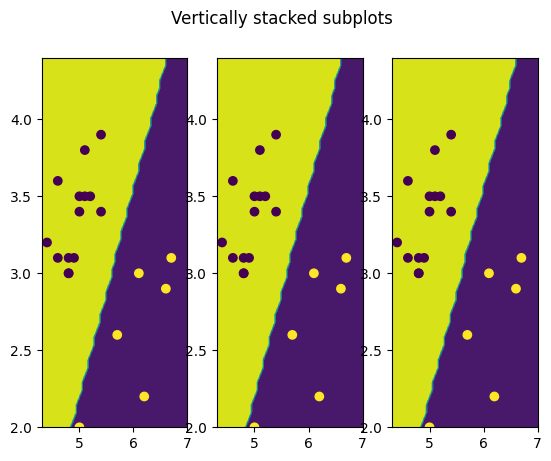

In [28]:
# 1. Load iris Dataset
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)

# 2. Select the first two features and the first two 
import numpy as np
selection = np.logical_or(y==1, y==0) 
X = X[selection, 0:2]
y = y[selection]
y[y==0] = -1 #needed to work with perceptron

# 3. Randomly split data into train, validation and test sets in proportion 5:2:3
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=420)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.6, random_state=420)

#4. For learning rate in [0.01, 0.1, 0.5]:
#   • Train a perceptron on the training set;
#   • Plot the data and the decision regions (hint: plt.scatter(), plt.contourf(), np.meshgrid())
#   • Evaluate on the validation set

class Perceptron:
    def __init__(self, learning_rate = 0.1, n_iter = 1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self._b = 0.0
        self._w = None
        self._misclassified_samples = []

    def f(self, x: np.array) -> float:
        return np.dot(x, self._w) + self._b
    
    def predict(self, x: np.array) -> int:
        return np.where(self.f(x)>= 0.0, 1, -1)

    def fit(self, x: np.array, y: np.array):
        self._b = 0.0
        self._w=np.zeros(x.shape[1])
        self._misclassified_samples = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, yi in zip(x, y):
                update = self.learning_rate * (yi - self.predict(xi))
                self._b += update
                self._w += update*xi
                errors += int(update != 0.0)
            self._misclassified_samples.append(errors)
    
    def score(self, x: np.array, y: np.array) -> float:
        pred = self.predict(x)
        correct_pred = sum(pred == y)
        return correct_pred/y.shape[0]
        

import matplotlib.pyplot as plt

res = 50
X_grid_0 = np.linspace(start=np.min(X[:,0]), stop=np.max(X[:,0]), num=res)
X_grid_1 = np.linspace(start=np.min(X[:,1]), stop=np.max(X[:,1]), num=res)
grid = np.meshgrid(X_grid_0, X_grid_1)
Y_grid = np.zeros([50,50])
lr = [0.01, 0.1, 0.5]
fig, axs = plt.subplots(1,3)
fig.suptitle('Different values of learning rates')
for k in np.arange(0,3):
    clf = Perceptron(learning_rate=lr[k])
    clf.fit(X_train, y_train)
    score = clf.score(X_val, y_val)
    for i in np.arange(0, res):
        for j in np.arange(0, res):
            Y_grid[i,j] = clf.predict([X_grid_0[i], X_grid_1[j]])
    
    axs[k].contourf(X_grid_0,X_grid_1,Y_grid)
    axs[k].scatter( X_val[:,0], X_val[:,1], c=y_val)

# ES2

1. Load Iris dataset
2. Simply select the first two dimensions
3. Randomly split data into train, validation and test sets in proportion 5:2:3
4. For C from $10^{-3}$ to $10^3$: (multiplying at each step by 10)
    - Train a linear SVM on the training set.
    - Plot the data and the decision boundaries
    - Evaluate the method on the validation set

c:\Users\giuli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\giuli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\giuli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


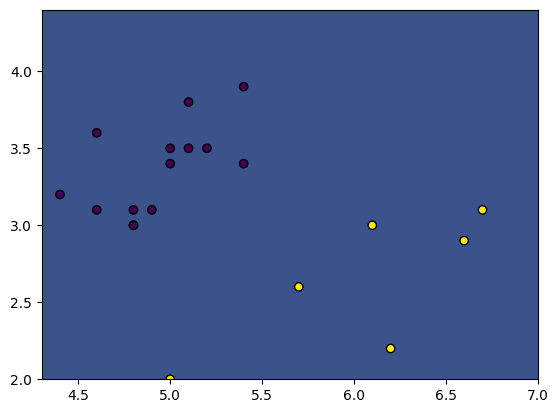

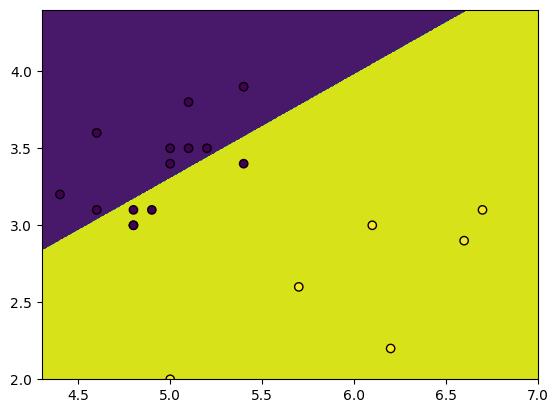

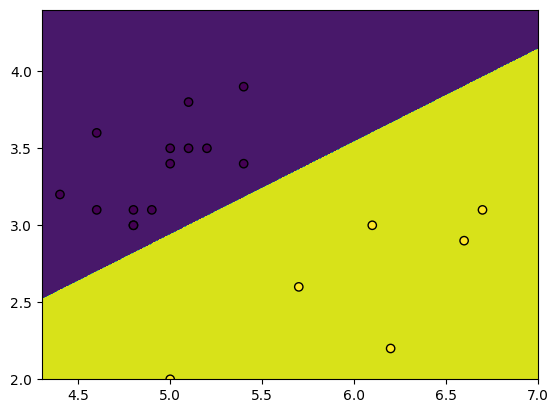

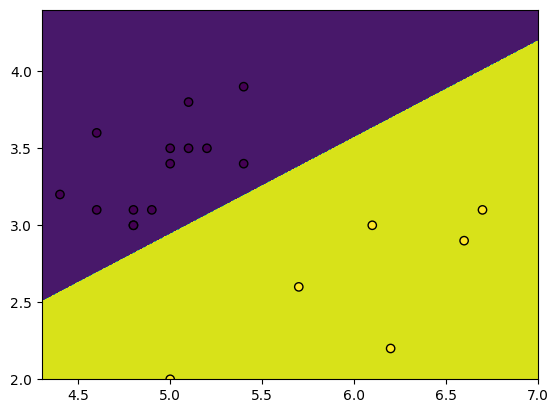

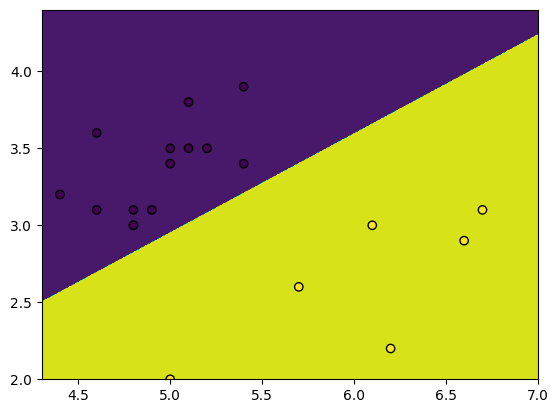

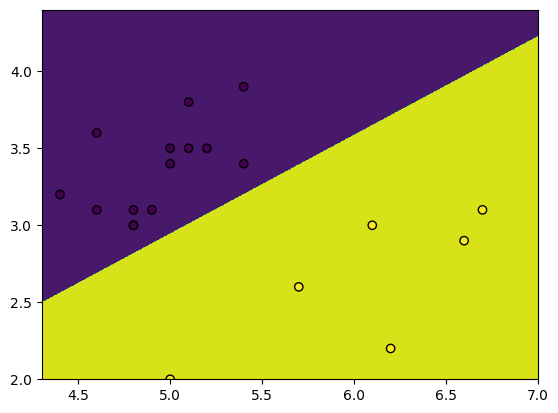

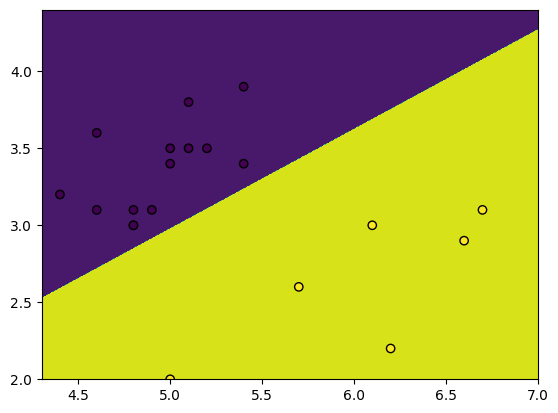

In [44]:


from sklearn.svm import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay
res = 500
X_grid_0 = np.linspace(start=np.min(X[:,0]), stop=np.max(X[:,0]), num=res)
X_grid_1 = np.linspace(start=np.min(X[:,1]), stop=np.max(X[:,1]), num=res)

feature_0, feature_1 = np.meshgrid(X_grid_0, X_grid_1)
grid = np.vstack([feature_0.ravel(), feature_1.ravel()]).T

C = np.power(10*np.ones(7), np.arange(-3,4))
accuracy = np.zeros(7)
for k in np.arange(0,7):
    clf = LinearSVC(C=C[k])
    clf.fit(X_train, y_train)
    y_pred = np.reshape(clf.predict(grid), feature_0.shape)
    accuracy[k]=clf.score(X_val, y_val)
    display = DecisionBoundaryDisplay(xx0=feature_0, xx1=feature_1, response=y_pred)
    display.plot()
    display.ax_.scatter( X_val[:,0], X_val[:,1], c=y_val, edgecolor="black")

In [47]:
clf = LinearSVC(C=C[np.argmax(accuracy)])
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

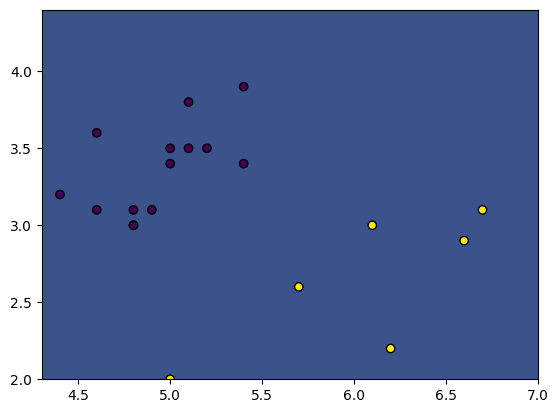

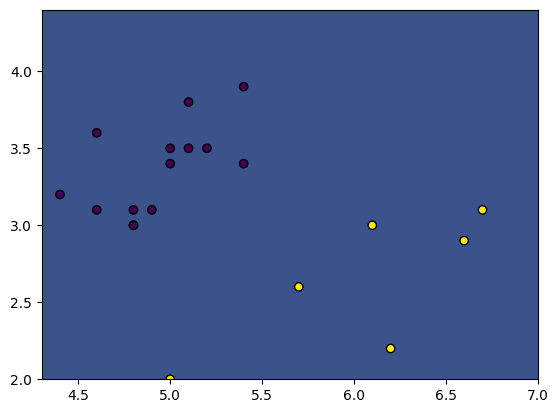

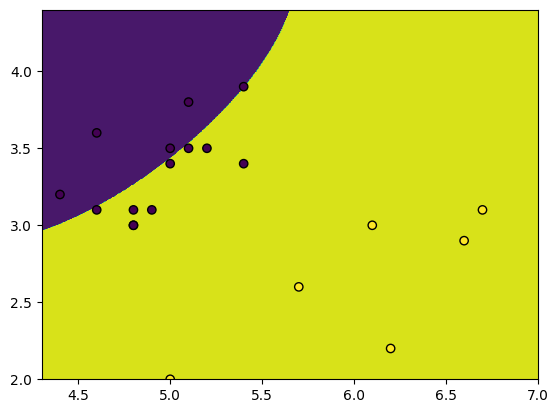

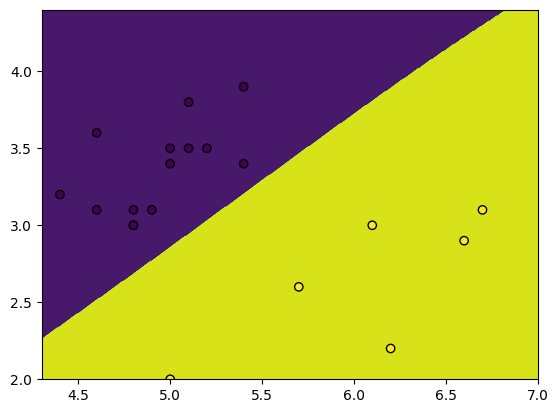

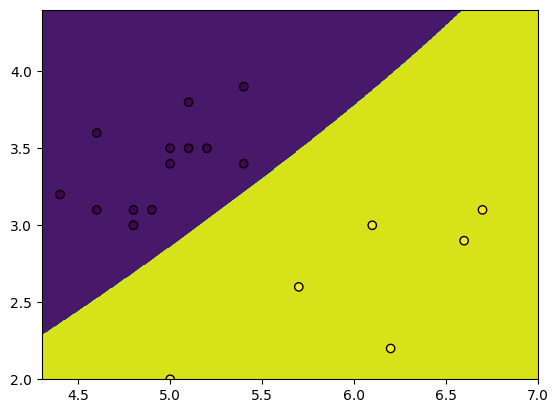

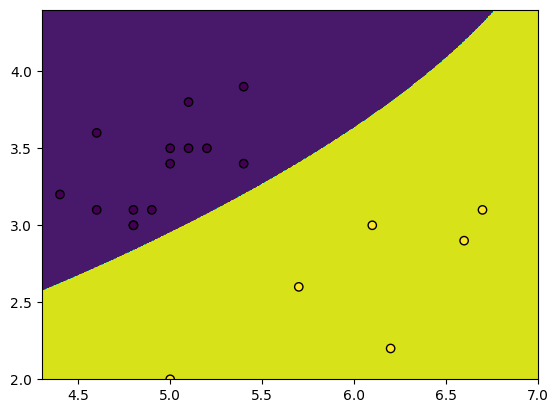

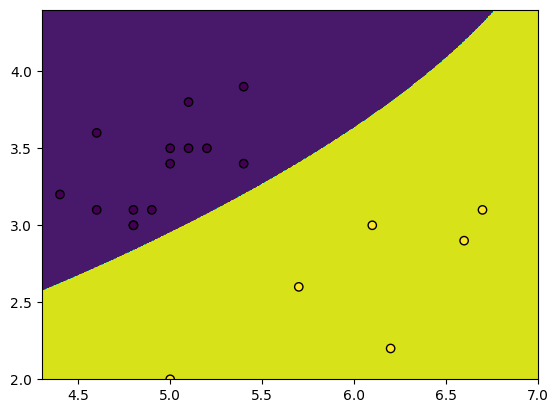

In [48]:


from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
res = 500
X_grid_0 = np.linspace(start=np.min(X[:,0]), stop=np.max(X[:,0]), num=res)
X_grid_1 = np.linspace(start=np.min(X[:,1]), stop=np.max(X[:,1]), num=res)

feature_0, feature_1 = np.meshgrid(X_grid_0, X_grid_1)
grid = np.vstack([feature_0.ravel(), feature_1.ravel()]).T

C = np.power(10*np.ones(7), np.arange(-3,4))
accuracy = np.zeros(7)
for k in np.arange(0,7):
    clf = SVC(C=C[k], kernel='rbf' )
    clf.fit(X_train, y_train)
    y_pred = np.reshape(clf.predict(grid), feature_0.shape)
    accuracy[k]=clf.score(X_val, y_val)
    display = DecisionBoundaryDisplay(xx0=feature_0, xx1=feature_1, response=y_pred)
    display.plot()
    display.ax_.scatter( X_val[:,0], X_val[:,1], c=y_val, edgecolor="black")